In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('attributes.csv')
df.head()

,product_uid,name,value
0,100001.0,Bullet01,Versatile connector for various 90° connection...
1,100001.0,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001.0,Bullet03,Help ensure joints are consistently straight a...
3,100001.0,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001.0,Bullet05,Made from 12-Gauge steel


In [3]:
df.shape

(2044803, 3)

In [4]:
df.isnull().sum()

product_uid     155
name            155
value          6422
dtype: int64

In [6]:
if df is not None:
    df.dropna(inplace=True)
else:
    print("Failed to read data from CSV file")

In [7]:
df.isnull().sum()

product_uid    0
name           0
value          0
dtype: int64

In [9]:
df = df.head(1000)
df = df.rename(columns={'value':'product_descriptions'})



In [10]:
df.head()

,product_uid,name,product_descriptions
0,100001.0,Bullet01,Versatile connector for various 90° connection...
1,100001.0,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001.0,Bullet03,Help ensure joints are consistently straight a...
3,100001.0,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001.0,Bullet05,Made from 12-Gauge steel


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["product_descriptions"])

In [12]:
Xn = vectorizer.get_feature_names_out()
Xn

array(['000', '012', '02', ..., 'zero', 'zinc', 'zip'], dtype=object)

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters = 10)
y_kmeans = kmeans.fit_predict(X)

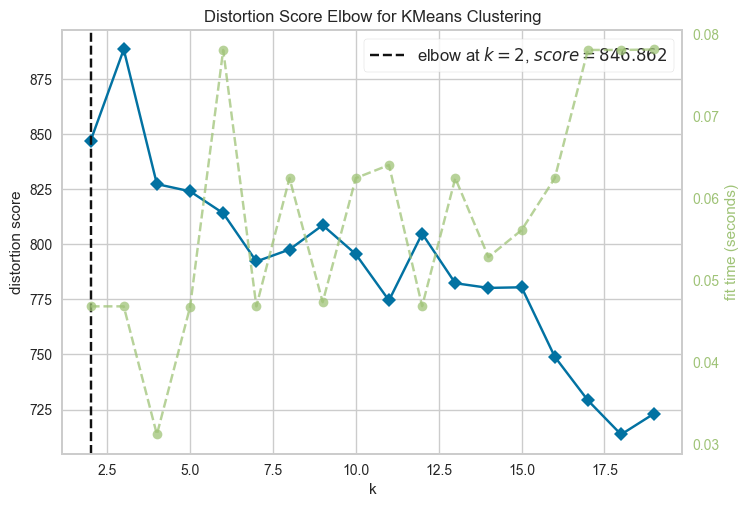

In [15]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k=(2,20))
visualizer.fit(X.toarray())
visualizer.show()
plt.show()

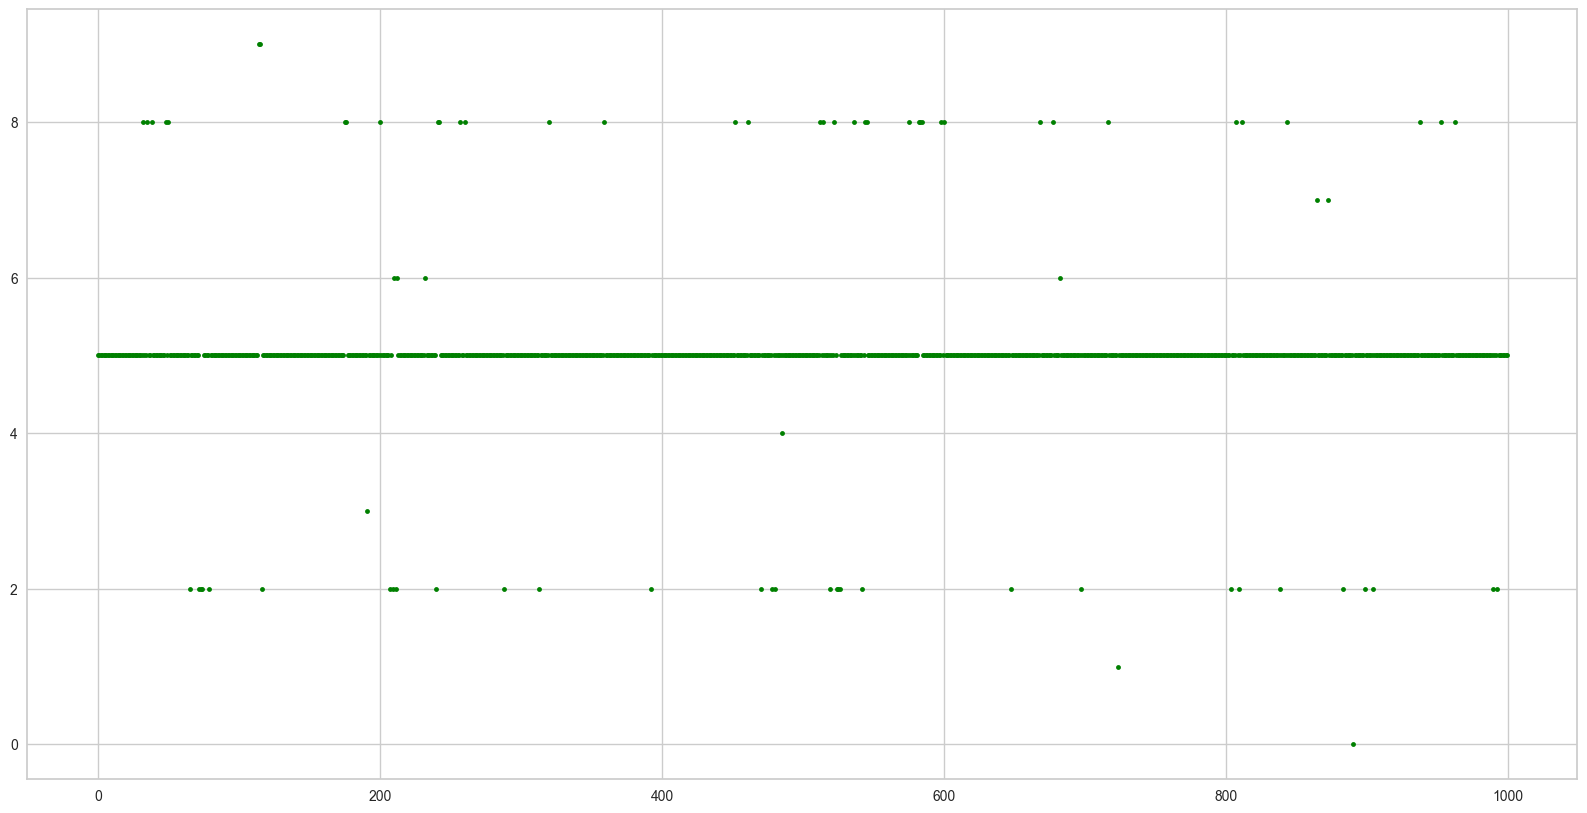

In [16]:
plt.figure(figsize=(20,10))
plt.plot(y_kmeans, ".",color='green')
plt.show()

In [17]:
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 19,
 'n_init': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [18]:
kmeans.score(X)

-723.1844391205206

In [19]:
labels = kmeans.labels_
labels

array([10, 10, 10, 10,  2, 10, 10, 10, 11, 10, 10, 10, 10, 10, 10, 10,  1,
       10,  1, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10,
        5, 12, 10, 10, 12, 10, 10, 10, 10, 10,  0, 10,  0, 10, 12,  0, 12,
       10, 10, 10, 10, 10,  0, 13,  8,  8, 10,  0, 10, 10, 10,  5, 10, 10,
       10, 10, 10, 10, 16,  5, 16,  0, 10, 10, 10, 16, 10, 10, 10, 10, 10,
       10, 10, 10, 10,  0, 10,  0,  0, 10,  0, 10, 10, 10, 10, 10,  0, 10,
       10, 10, 10, 10, 10, 10,  0, 10, 10, 10, 10, 13, 10, 10, 16, 10, 10,
       10, 10, 10, 10, 10, 10, 10,  9, 10, 10, 10, 10, 10, 10, 10,  4, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 13, 11, 10, 10,  4, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10,  4, 10, 10, 13, 12, 12, 10, 10, 10, 10, 10, 18, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 13, 13, 10, 10, 10,  0, 15, 15, 12, 18, 10, 10,
       10, 10,  5, 16, 10, 16, 10, 16, 10, 10, 10, 10, 10, 11, 10, 10, 10,
       10,  0, 10, 10, 10

In [20]:
cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
cluster_ids, cluster_sizes

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 array([ 54,   2,   1,   1,   5,  14,   3,   1,  17,   6, 788,  13,  37,
         12,   2,   6,  28,   2,   8], dtype=int64))

In [21]:
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(10):
    print("Cluster :",i),
    for ind in order_centroids[i, :10]:
        print(terms[ind])

Top terms per cluster:
Cluster : 0
no
in
yes
for
10
25
black
vary
of
to
Cluster : 1
63
in
zip
efficient
each
ease
easiest
easily
easy
eco
Cluster : 2
gauge
made
from
12
steel
efficiency
ease
easiest
easily
easy
Cluster : 3
kwik
patented
connect
features
technology
installation
easy
for
efficient
ease
Cluster : 4
13
17
in
paint
be
warranty
it
low
clock
out
Cluster : 5
75
25
11
no
and
96
black
22
privacy
resistant
Cluster : 6
28
875
25
yes
for
of
with
steel
75
wall
Cluster : 7
approved
csa
ul
and
zip
efficiently
easy
eco
edging
edgings
Cluster : 8
white
color
25
metal
22
plastic
black
72
15
be
Cluster : 9
15
28
no
in
white
for
to
75
the
is


In [25]:
Y = vectorizer.transform(["wall"])
prediction = kmeans.predict(Y)
print("Cluster :",i),
for ind in order_centroids[i, :15]:
    print(terms[ind])

Cluster : 9
15
28
no
in
white
for
to
75
the
is
use
vary
listed
installation
metal
